                        date    category  amount
0  2022-07-06 05:57:10 +0000  Restuarant    5.50
1  2022-07-06 05:57:27 +0000      Market    2.00
2  2022-07-06 05:58:12 +0000       Coffe   30.10
3  2022-07-06 05:58:25 +0000      Market   17.33
4  2022-07-06 05:59:00 +0000  Restuarant    5.50
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3608 entries, 0 to 3607
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      3608 non-null   object 
 1   category  3608 non-null   object 
 2   amount    3608 non-null   float64
dtypes: float64(1), object(2)
memory usage: 84.7+ KB


C:\Users\sandr\AppData\Local\Temp\ipykernel_16200\2432775290.py:19: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['Month'] = df['date'].dt.to_period('M')
C:\Users\sandr\AppData\Local\Temp\ipykernel_16200\2432775290.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categoria_gasto.values, y=categoria_gasto.index,palette="viridis")


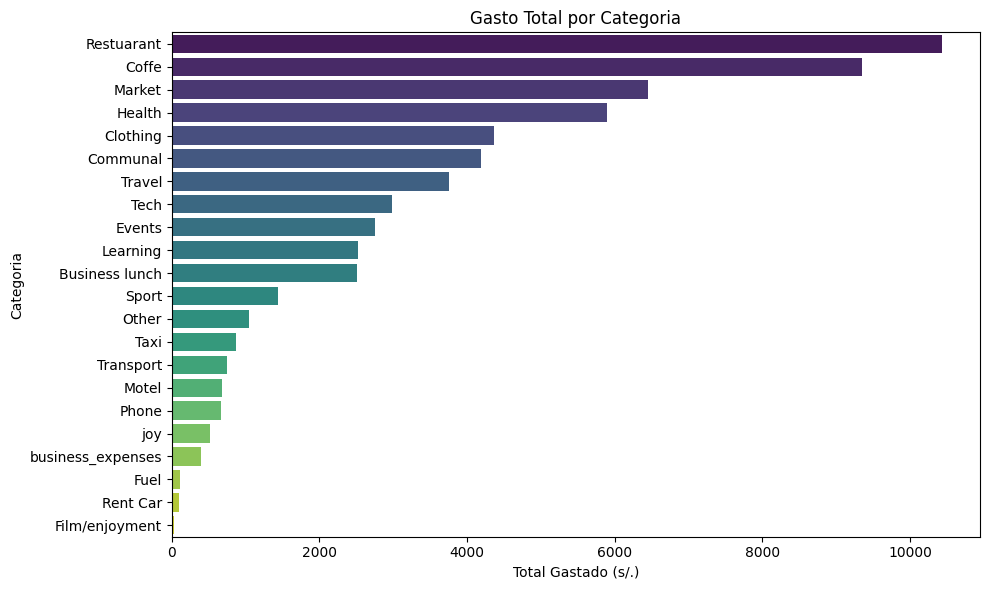

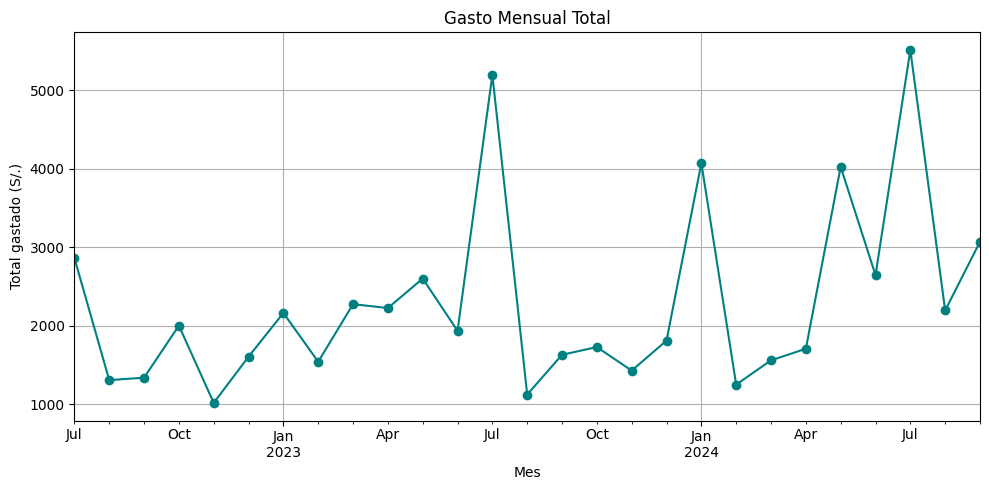

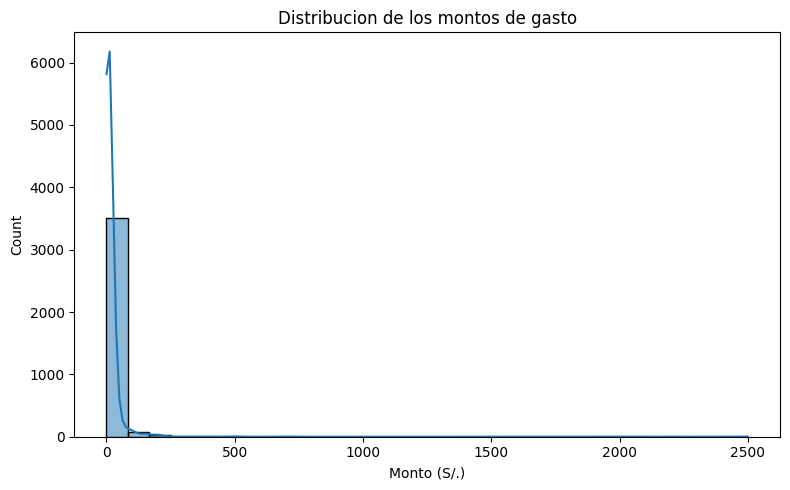

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_csv("C:/dev/Cursos/data analysis projects/proyecto_gastos_personales/data/budget_data.csv")

# Ver primeras filas
print(df.head())

#Verificar info general y limpieza basica
df.info()
df.drop_duplicates(inplace=True)

#Convertir fechas
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'],utc=True, errors='coerce')
    df = df.dropna(subset=['date'])
    df['Month'] = df['date'].dt.to_period('M')
    df = df.sort_values('date')
    

# Análisis 1: Gasto total por categoría
plt.figure(figsize=(10,6))
categoria_gasto = df.groupby('category')['amount'].sum().sort_values(ascending=False)
sns.barplot(x=categoria_gasto.values, y=categoria_gasto.index,palette="viridis")
plt.title("Gasto Total por Categoria")
plt.xlabel("Total Gastado (s/.)")
plt.ylabel("Categoria")
plt.tight_layout()
plt.savefig("C:/dev/Cursos/data analysis projects/proyecto_gastos_personales/output/gasto_categoria.png")
plt.show()

#Analisis 2: Gasto Mensual total
# Agrupar por mes
gasto_mensual = df.groupby('Month')['amount'].sum()
# Gráfico de línea
plt.figure(figsize=(10,5))
gasto_mensual.plot(marker='o', color='teal')
plt.title("Gasto Mensual Total")
plt.xlabel("Mes")
plt.ylabel("Total gastado (S/.)")
plt.grid(True)
plt.tight_layout()
plt.savefig("C:/dev/Cursos/data analysis projects/proyecto_gastos_personales/output/gasto_mensual.png")
plt.show()

#Analisis 3: Distribucion de Montos
plt.figure(figsize=(8,5))
sns.histplot(df['amount'],bins=30,kde=True)
plt.title("Distribucion de los montos de gasto")
plt.xlabel("Monto (S/.)")
plt.tight_layout()
plt.savefig("C:/dev/Cursos/data analysis projects/proyecto_gastos_personales/output/distribucion_montos.png")
plt.show()

#Analisis 4: Gasto promedio por categoria
plt.figure(figsize=(10,6))
promedio_categoria = df.groupby('category')['amount'].mean().sort_values(ascending=False)
sns.barplot(x=promedio_categoria.values,y=promedio_categoria.index,palette="crest")
plt.title("Gasto Promedio por Categoria")
plt.xlabel("Promedio (S/.)")
plt.ylabel("Categoria")
plt.tight_layout()
plt.savefig("C:/dev/Cursos/data analysis projects/proyecto_gastos_personales/output/promedio_categoria.png")
plt.show()

#Analisis 5: Frecuencia de gastos por dia de la semana
df['weekday'] = df['date'].dt.day_name()
frecuencia_dia = df['weekday'].value_counts().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.figure(figsize=(10,5))
sns.barplot(x=frecuencia_dia.index,y=frecuencia_dia.values,palette="mako")
plt.title("Frecuencia de Gastos por dia de la semana")
plt.xlabel("Dia")
plt.ylabel("Cantidad de transacciones")
plt.tight_layout()
plt.savefig("C:/dev/Cursos/data analysis projects/proyecto_gastos_personales/output/frecuencia_dias.png")
plt.show()


#Guardar Analisis Resumen
df.to_csv("C:/dev/Cursos/data analysis projects/proyecto_gastos_personales/output/resumen_gastos.csv",index=False)



